Import packages necessary for preliminary data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Basic analysis of Median income over time.

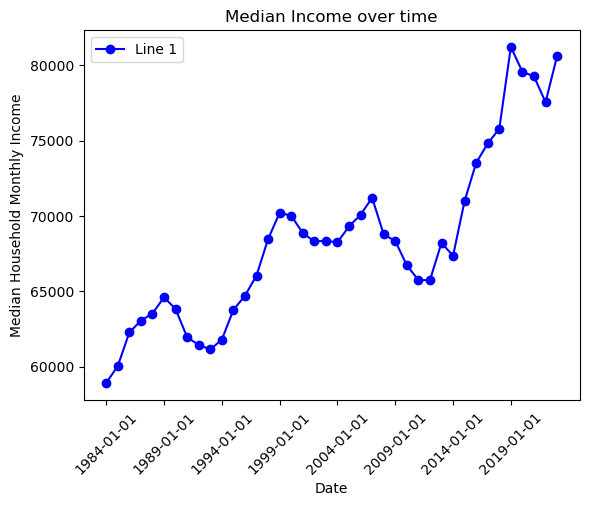

In [2]:
df = pd.read_csv(r"..\DATA\median_household_income.csv")

df['observation_date'] = pd.to_datetime(df['observation_date'])

plt.plot(df['observation_date'], df['MEHOINUSA672N'], marker='o', linestyle='-', color='b', label="Line 1")

plt.xlabel("Date")
plt.ylabel("Median Household Monthly Income")
plt.title("Median Income over time")
plt.xticks(df['observation_date'][::5], rotation=45)

plt.legend()

plt.show()

In [34]:
df = pd.read_csv(r"..\DATA\median_household_income.csv", parse_dates=['observation_date'])
print(df.head())

df.dropna(subset=['observation_date'], inplace=True)

df.set_index('observation_date', inplace=True)

df['Change'] = df['MEHOINUSA672N'].pct_change() * 100

df.dropna(inplace=True)

df.to_csv(r"..\DATA\median_household_income_daily_change.csv")

  observation_date  MEHOINUSA672N
0       1984-01-01          58930
1       1985-01-01          60050
2       1986-01-01          62280
3       1987-01-01          63060
4       1988-01-01          63530


GDP per capita basic exploration

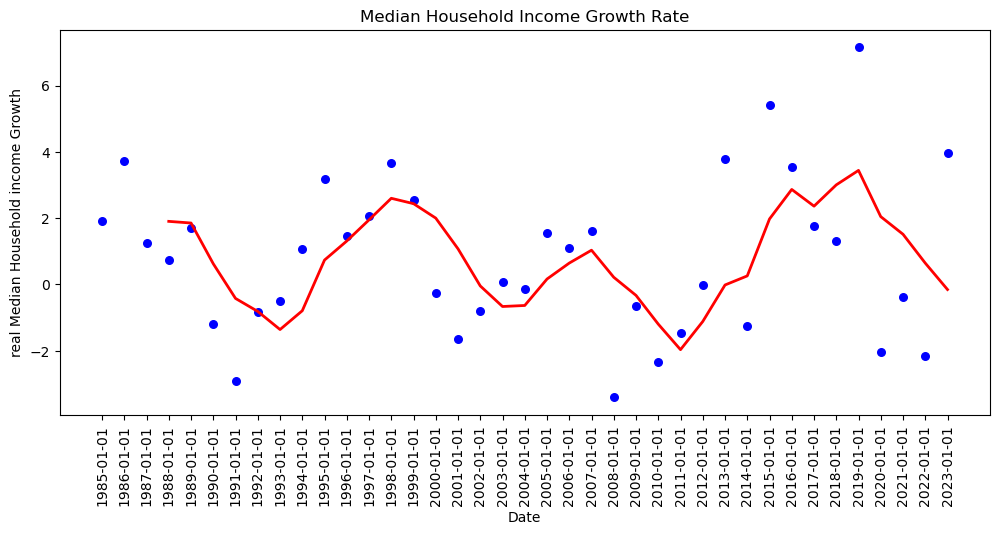

In [38]:
df = pd.read_csv(r"..\DATA\median_household_income_daily_change.csv")

df['observation_date'] = pd.to_datetime(df['observation_date'])

df['rolling_avg'] = df['Change'].rolling(window=4).mean()

plt.figure(figsize=(12, 5))

plt.scatter(df['observation_date'], df['Change'], color='blue', s=30, label="Yearly Change")

plt.plot(df['observation_date'], df['rolling_avg'], color='red', linewidth=2, label="4 yearly Rolling Average")

plt.xlabel("Date")
plt.ylabel("real Median Household income Growth")
plt.title("Median Household Income Growth Rate")
plt.xticks(df['observation_date'], rotation=90)

plt.show()

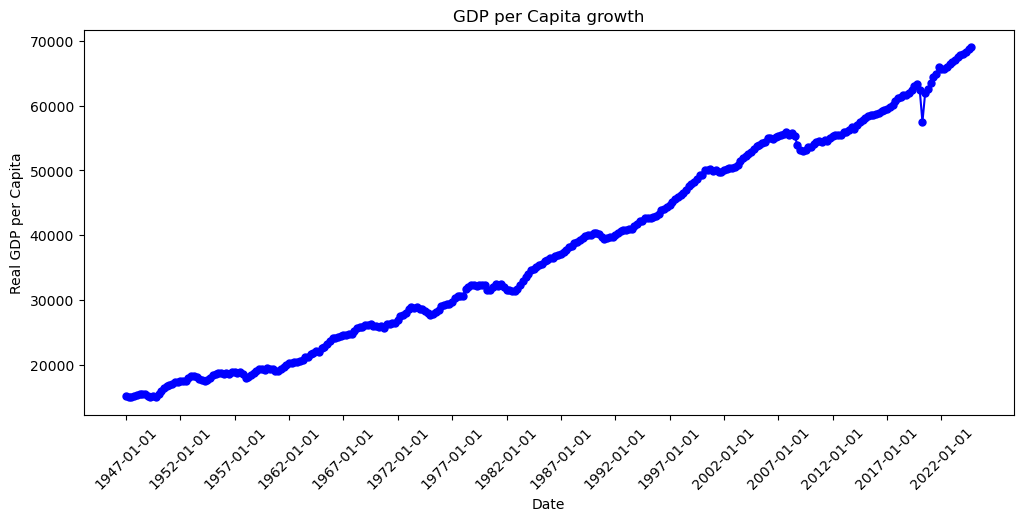

In [3]:
df = pd.read_csv(r"..\DATA\real_GDP_per_capita.csv")

df['observation_date'] = pd.to_datetime(df['observation_date'])

plt.figure(figsize=(12, 5))

plt.plot(df['observation_date'], df['A939RX0Q048SBEA'], marker='o', linestyle='-', markersize=5, color='b', label="Line 1")

plt.xlabel("Date")
plt.ylabel("Real GDP per Capita")
plt.title("GDP per Capita growth")
plt.xticks(df['observation_date'][::20], rotation=45)

plt.show()

In [29]:
# Load data and parse the 'Date' column as datetime during import
df = pd.read_csv(r"..\DATA\real_GDP_per_capita.csv", parse_dates=['observation_date'])
print(df.head())  # Verify the Date column

# Drop rows with invalid dates (if any)
df.dropna(subset=['observation_date'], inplace=True)

# Set the Date column as the index (only once)
df.set_index('observation_date', inplace=True)
print("Index before removing timezone:", df.index)

# Calculate the daily percentage change of the 'Close' column
df['Change'] = df['A939RX0Q048SBEA'].pct_change() * 100  # Multiply by 100 for percent

# Drop the first row which will have NaN for the percentage change
df.dropna(inplace=True)

# Save the processed data
df.to_csv(r"..\DATA\real_GDP_per_capita_daily_change.csv")

print("Daily data with percentage change saved successfully.")

  observation_date  A939RX0Q048SBEA
0       1947-01-01            15248
1       1947-04-01            15139
2       1947-07-01            15039
3       1947-10-01            15204
4       1948-01-01            15371
Index before removing timezone: DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
               '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01',
               ...
               '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01',
               '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01',
               '2024-07-01', '2024-10-01'],
              dtype='datetime64[ns]', name='observation_date', length=312, freq=None)
Daily data with percentage change saved successfully.


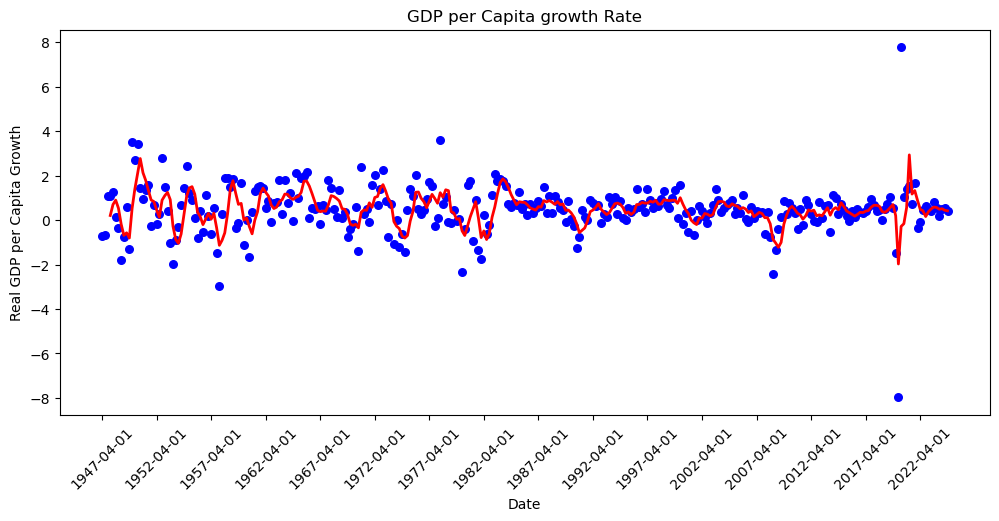

In [ ]:
df = pd.read_csv(r"..\DATA\real_GDP_per_capita_daily_change.csv")

df['observation_date'] = pd.to_datetime(df['observation_date'])

df['rolling_avg'] = df['Change'].rolling(window=4).mean()

plt.figure(figsize=(12, 5))

plt.scatter(df['observation_date'], df['Change'], color='blue', s=30, label="Quarterly Change")

plt.plot(df['observation_date'], df['rolling_avg'], color='red', linewidth=2, label="Yearly Rolling Average")

plt.xlabel("Date")
plt.ylabel("Real GDP per Capita Growth")
plt.title("GDP per Capita growth Rate")
plt.xticks(df['observation_date'][::20], rotation=45)

plt.show()

In [17]:
# Load data and parse the 'Date' column as datetime during import
df = pd.read_csv(r"..\DATA\sp500_historical_data.csv", parse_dates=['Date'])
print(df.head())  # Verify the Date column

# Drop rows with invalid dates (if any)
df.dropna(subset=['Date'], inplace=True)

# Set the Date column as the index (only once)
df.set_index('Date', inplace=True)
print("Index before removing timezone:", df.index)

# Calculate the daily percentage change of the 'Close' column
df['Close_Change'] = df['Close'].pct_change() * 100  # Multiply by 100 for percent

# Drop the first row which will have NaN for the percentage change
df.dropna(inplace=True)

# Save the processed data
df.to_csv(r"..\DATA\sp500_daily_change.csv")

print("Daily data with percentage change saved successfully.")

                        Date       Open       High        Low      Close  \
0  1927-12-30 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000   
1  1928-01-03 00:00:00-05:00  17.760000  17.760000  17.760000  17.760000   
2  1928-01-04 00:00:00-05:00  17.719999  17.719999  17.719999  17.719999   
3  1928-01-05 00:00:00-05:00  17.549999  17.549999  17.549999  17.549999   
4  1928-01-06 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000   

   Volume  Dividends  Stock Splits  
0       0        0.0           0.0  
1       0        0.0           0.0  
2       0        0.0           0.0  
3       0        0.0           0.0  
4       0        0.0           0.0  
Index before removing timezone: Index([1927-12-30 00:00:00-05:00, 1928-01-03 00:00:00-05:00,
       1928-01-04 00:00:00-05:00, 1928-01-05 00:00:00-05:00,
       1928-01-06 00:00:00-05:00, 1928-01-09 00:00:00-05:00,
       1928-01-10 00:00:00-05:00, 1928-01-11 00:00:00-05:00,
       1928-01-12 00:00:00-05:00, 1928-01-13 

Historical Value of the S&P500. The S&P500 is a aggregate of 500 of the largest companies in America. It is a broad representation of the stock market in America over time.

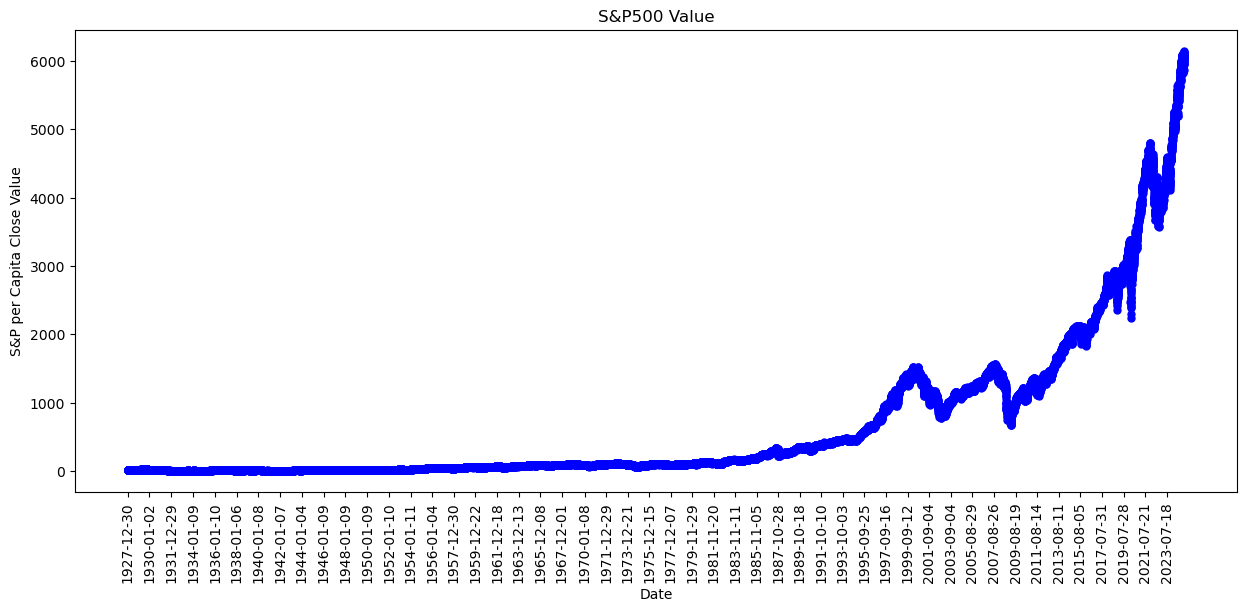

In [29]:
df = pd.read_csv(r"..\DATA\sp500_historical_data.csv")

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15, 6))

plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', markersize=5, color='b', label="Line 1")

plt.xlabel("Date")
plt.ylabel("S&P per Capita Close Value")
plt.title("S&P500 Value")
plt.xticks(df['Date'][::500], rotation=90)

plt.show()

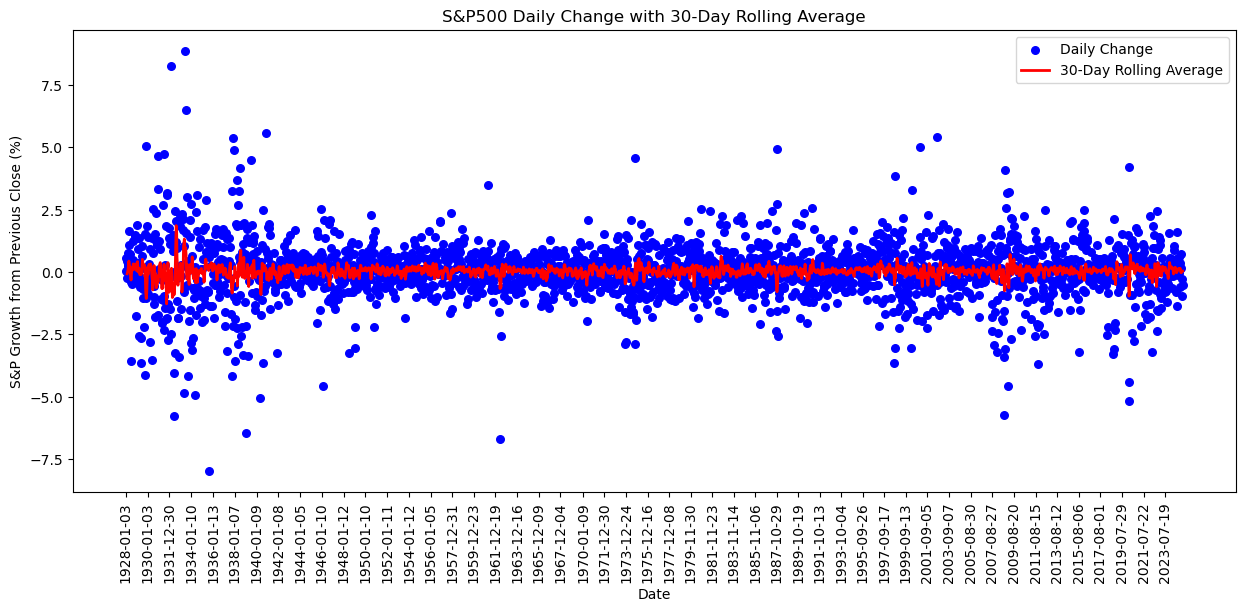

In [27]:
# Load data
df = pd.read_csv(r"..\DATA\sp500_daily_change.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the 30-day rolling average
df['rolling_avg'] = df['Close_Change'].rolling(window=30).mean()

plt.figure(figsize=(15, 6))

# Plot every 5th point for the scatter plot
plt.scatter(df['Date'][::10], df['Close_Change'][::10], color='blue', s=30, label="Daily Change")

# Plot every 5th point for the rolling average line
plt.plot(df['Date'][::10], df['rolling_avg'][::10], color='red', linewidth=2, label="30-Day Rolling Average")

plt.xlabel("Date")
plt.ylabel("S&P Growth from Previous Close (%)")
plt.title("S&P500 Daily Change with 30-Day Rolling Average")
plt.xticks(df['Date'][::500], rotation=90)
plt.legend()

plt.show()


Historical unemployment rate. Usually it only increasing during recessions. There is an anomaly during the COVID-19 pandemic, where many people were unable to work.

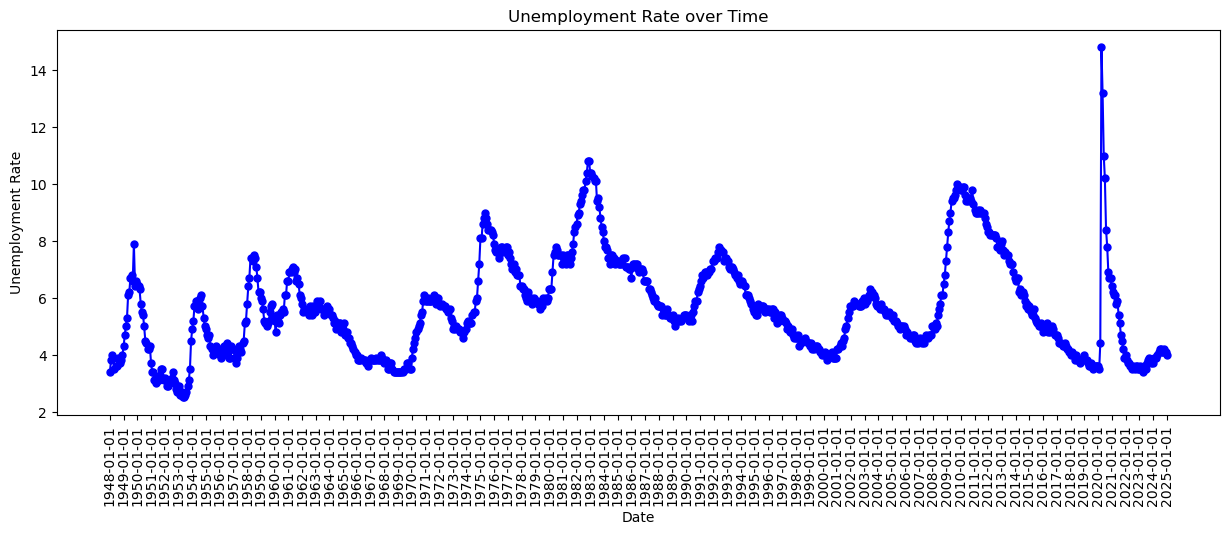

In [33]:
df = pd.read_csv(r"..\DATA\unemployment_rate.csv")

df['observation_date'] = pd.to_datetime(df['observation_date'])

plt.figure(figsize=(15, 5))

plt.plot(df['observation_date'], df['UNRATE'], marker='o', linestyle='-', markersize=5, color='b', label="Line 1")

plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate over Time")
plt.xticks(df['observation_date'][::12], rotation=90)

plt.show()